# E-COMMERCE: EXPLORATORY DATA ANALYSIS

In [2]:
# IMPORT THE NECESSARY LIBRARIES.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset.
df = pd.read_csv('ecommerce_data.csv')

In [4]:
# Displaying the first 5 rows of the dataset.
df.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [5]:
# Displaying the last 5 rows of the dataset.
df.tail()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
54995,295864,5407639888,Other,25-45,23/02/2020 10:42:04,Electronics,Yes,SEASONALOFFER21,110.89,2819.9073,2709.0173,Debit Card,Other
54996,706435,1144029904,Other,18-25,12/07/2021 15:59:21,Electronics,Yes,SEASONALOFFER21,488.59,3891.3039,3402.7139,Cash on Delivery,Bangalore
54997,649435,9587323189,Male,45-60,02/08/2024 09:30:44,Home & Kitchen,Yes,NEWYEARS,417.63,4094.6875,3677.0575,Credit Card,Mumbai
54998,982183,5032564481,Female,45-60,05/08/2020 23:57:56,Beauty and Health,Yes,SEASONALOFFER21,204.56,3977.4735,3772.9135,Credit Card,Kolkata
54999,126691,9172953722,Male,25-45,21/07/2022 09:05:18,Beauty and Health,Yes,NEWYEARS,380.81,3703.5819,3322.7719,Credit Card,Mumbai


In [6]:
# Understanding how much data we have.
df.shape

(55000, 13)

In [7]:
# Information of the data like null values, data-type etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CID                    55000 non-null  int64  
 1   TID                    55000 non-null  int64  
 2   Gender                 55000 non-null  object 
 3   Age Group              55000 non-null  object 
 4   Purchase Date          55000 non-null  object 
 5   Product Category       55000 non-null  object 
 6   Discount Availed       55000 non-null  object 
 7   Discount Name          27415 non-null  object 
 8   Discount Amount (INR)  55000 non-null  float64
 9   Gross Amount           55000 non-null  float64
 10  Net Amount             55000 non-null  float64
 11  Purchase Method        55000 non-null  object 
 12  Location               55000 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 5.5+ MB


# DATA CLEANING

In [9]:
# Converting the Purchase Date column to datetime datatype.
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

In [10]:
# Checking Null values in the dataset
df.isnull().sum()

CID                          0
TID                          0
Gender                       0
Age Group                    0
Purchase Date                0
Product Category             0
Discount Availed             0
Discount Name            27585
Discount Amount (INR)        0
Gross Amount                 0
Net Amount                   0
Purchase Method              0
Location                     0
dtype: int64

The 'Discount Name' column has Null values which needs to be handled.

In [12]:
df[df['Discount Name'].isna()]

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
3,180333,1395204173,Other,60 and above,2020-11-04 04:41:57,Sports & Fitness,No,NaN,0.0,5695.61265,5695.61265,Debit Card,Delhi
6,668787,9460023916,Male,25-45,2023-10-08 16:59:52,Electronics,No,NaN,0.0,5593.93560,5593.93560,PhonePe UPI,Delhi
7,933551,6877673032,Female,18-25,2022-12-14 20:13:45,Electronics,No,NaN,0.0,1901.79640,1901.79640,Credit Card,Delhi
8,414167,2841266620,Male,18-25,2020-04-29 09:10:46,Pet Care,No,NaN,0.0,3961.67100,3961.67100,Debit Card,Delhi
10,931578,5168806107,Other,25-45,2022-12-09 19:54:47,Clothing,No,NaN,0.0,7824.16530,7824.16530,Credit Card,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54989,812597,3862962312,Male,45-60,2022-08-07 11:42:13,Clothing,No,NaN,0.0,2335.09800,2335.09800,Credit Card,Pune
54990,180783,4001403523,Male,25-45,2024-08-06 23:15:21,Home & Kitchen,No,NaN,0.0,2679.33750,2679.33750,Credit Card,Delhi
54991,103234,5584476454,Other,45-60,2021-08-29 18:47:25,Other,No,NaN,0.0,2385.43800,2385.43800,Credit Card,Bangalore
54992,639165,8525877571,Male,25-45,2022-05-15 20:32:26,Electronics,No,NaN,0.0,4489.95650,4489.95650,Credit Card,Kolkata


In [13]:
# Replacing the Null Values in Discount Name column.
df['Discount Name'] = df['Discount Name'].fillna('No Discount')

In [14]:
df.isnull().sum()

CID                      0
TID                      0
Gender                   0
Age Group                0
Purchase Date            0
Product Category         0
Discount Availed         0
Discount Name            0
Discount Amount (INR)    0
Gross Amount             0
Net Amount               0
Purchase Method          0
Location                 0
dtype: int64

In [15]:
df['Discount Name'].value_counts()

Discount Name
No Discount        27585
NEWYEARS            8135
SEASONALOFFER21     6940
FESTIVE50           4115
SAVE10              4115
WELCOME5            4110
Name: count, dtype: int64

The 'Net Amount' column has negative values we need to remove them from our dataset.

In [17]:
# Considering only Positive values in the Net Amount column.
df = df[df['Net Amount'] >= 0]

In [18]:
# Check if there are any negative values in the Net Amount column.
df[df['Net Amount'] <= 0]

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location


In [19]:
# To check duplicate rows.
df.duplicated().sum()

0

In [20]:
df[df['TID'].duplicated()]

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location


# EDA

# UNIVARIATE ANALYSIS

Text(0, 0.5, 'Count')

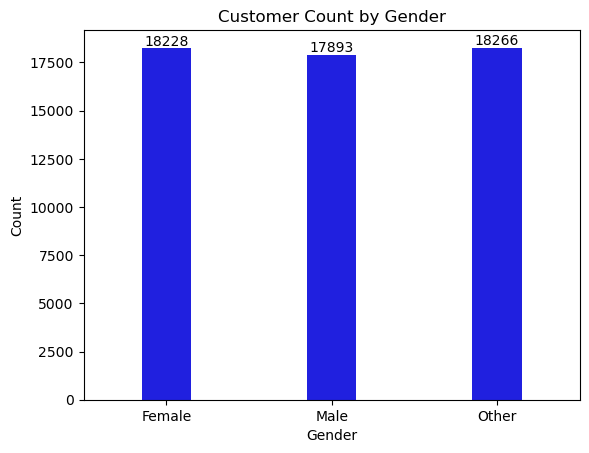

In [23]:
# Customer count based on the Gender.
ax = sns.countplot(x=df['Gender'],data=df,width=0.3,color='blue')
ax.bar_label(container=ax.containers[0])
plt.title('Customer Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

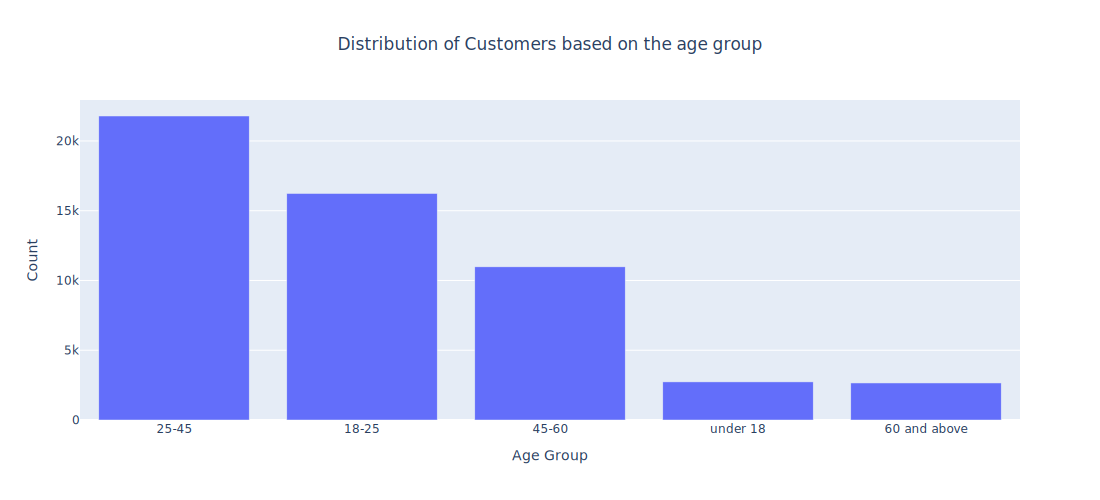

In [24]:
# Distribution of Customers based on the age group.
age_grp_counts = df['Age Group'].value_counts()

fig = px.bar(x=age_grp_counts.index, y=age_grp_counts.values,
             title="Distribution of Customers based on the age group",
             labels={'x': 'Age Group', 'y': 'Count'},
             width=1100,
             height=500
             )
fig.update_layout(title_x=0.5)
fig.show("svg")

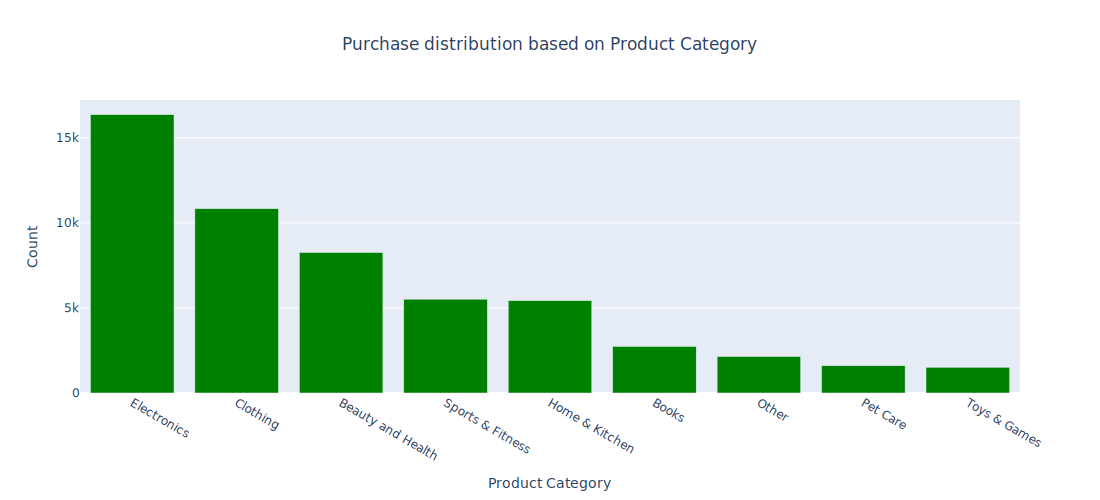

In [25]:
# Purchase distribution based on Product Category.

product_category_counts = df['Product Category'].value_counts()
fig = px.bar(x=product_category_counts.index, y=product_category_counts.values,
             title="Purchase distribution based on Product Category",
             labels={'x': 'Product Category', 'y': 'Count'},
             color_discrete_sequence=["green"],
             width=1100,
             height=500)  

fig.update_layout(xaxis_tickangle=30,title_x=0.5)

fig.show("svg")

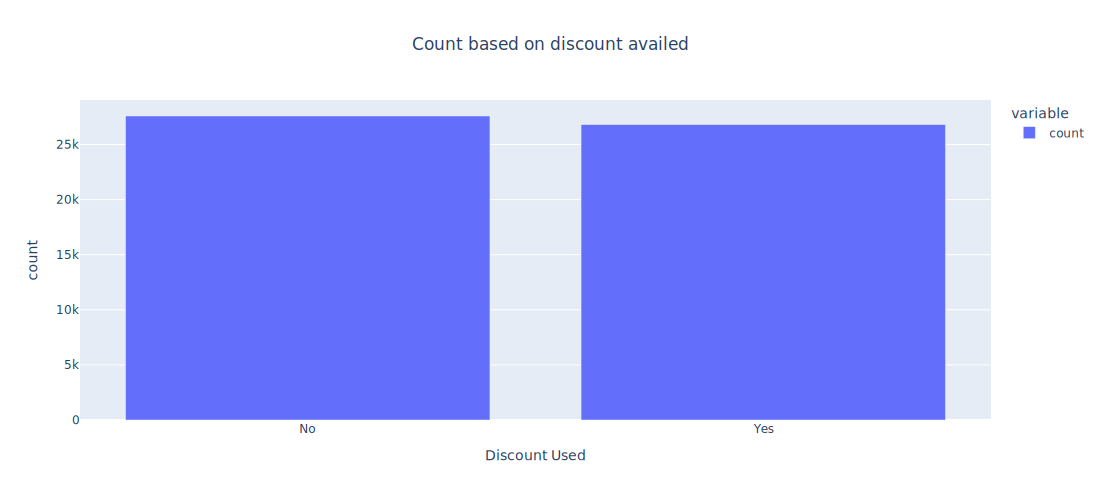

In [26]:
# Count based on discount availed or not.
fig = px.bar(df['Discount Availed'].value_counts(),
             title="Count based on discount availed",
             hover_data= {'variable': None},
             labels={'value': 'count', 'Discount Availed': 'Discount Used'
              },
             width=1100,
             height=500
         )
fig.update_layout(title_x=0.5)
fig.show("svg")

In [27]:
# Checking if there is any impact of month on purchases.
df['Purchase Month'] = df['Purchase Date'].dt.month_name()
df['Purchase Month'].unique()

array(['August', 'February', 'March', 'November', 'May', 'July',
       'October', 'December', 'April', 'September', 'June', 'January'],
      dtype=object)

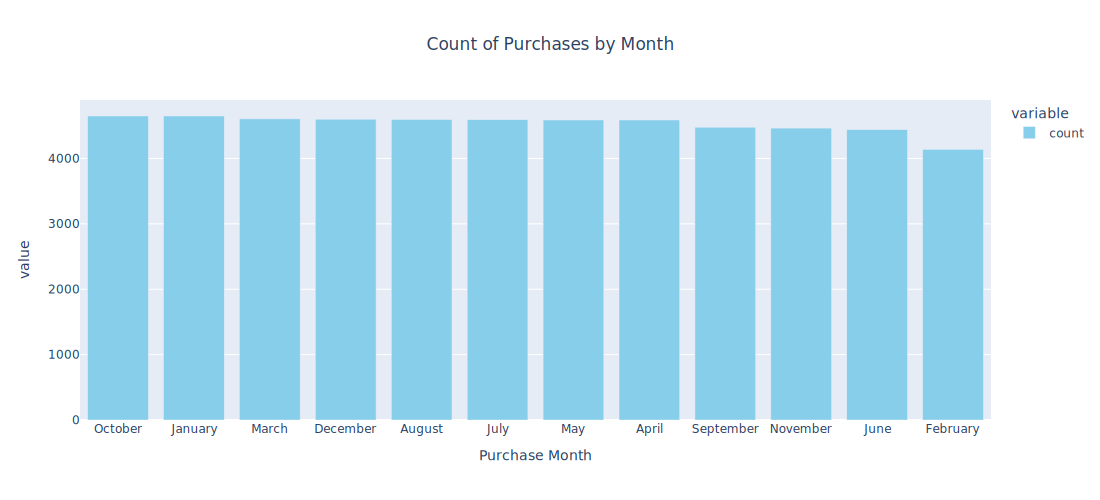

In [28]:
fig = px.bar(df['Purchase Month'].value_counts(),
             title='Count of Purchases by Month',
             labels={'x': 'Purchase Month', 'y': 'Count'},
             category_orders={'Purchase Month': df['Purchase Month'].value_counts().index},
             color_discrete_sequence=["skyblue"],
             width=1100,
             height=500
            )  
fig.update_layout(title_x=0.5)
fig.show("svg")

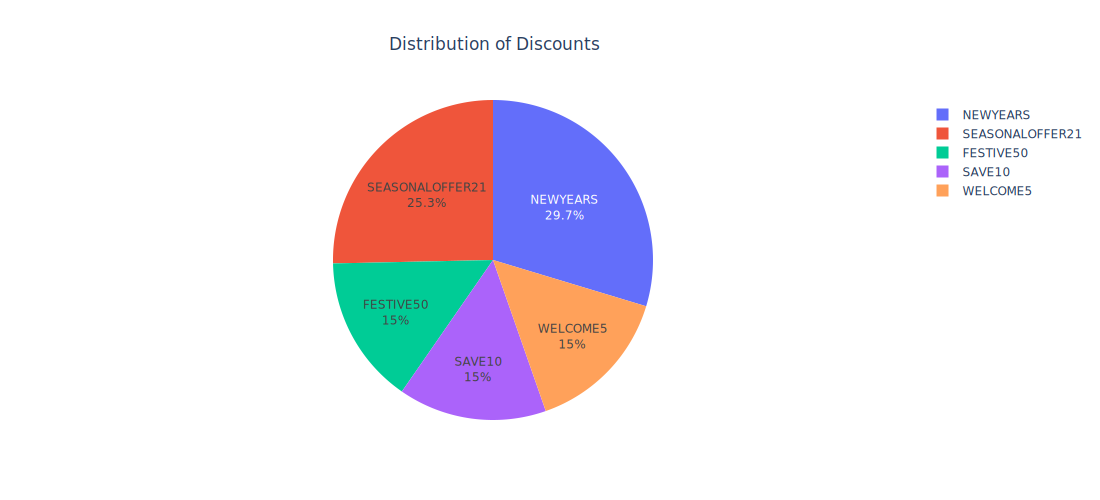

In [29]:
# Distribution of discount based on the Discount Name.
df_discount = df[df['Discount Name'] != 'No Discount']
discount_counts = df_discount['Discount Name'].value_counts()

fig = px.pie(values=discount_counts.values,
             names=discount_counts.index,
             title='Distribution of Discounts',
             width=1100,
             height=500)

fig.update_traces(textinfo='percent+label')
fig.update_layout(title_x=0.45)
fig.show("svg")

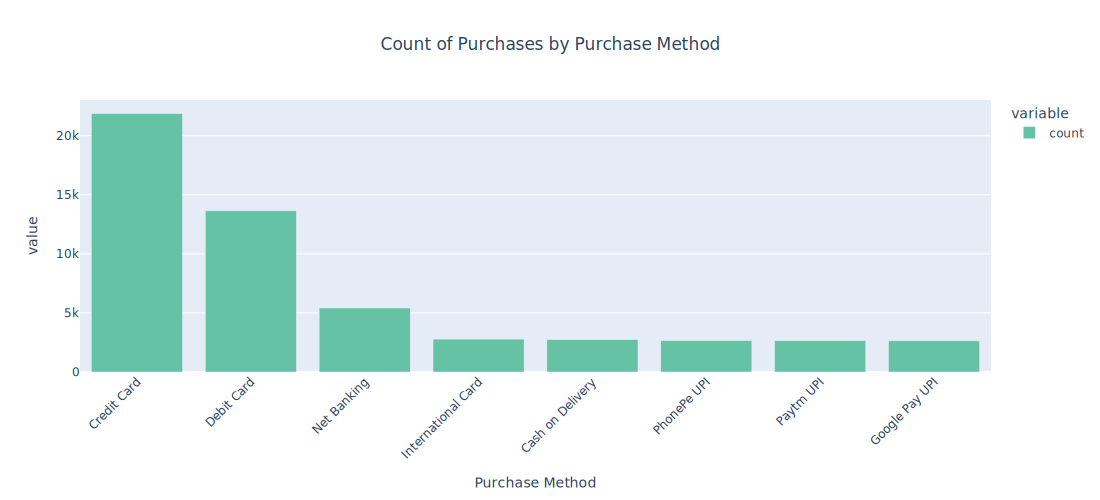

In [30]:
# Count of purchase based on the Payment Method.
fig = px.bar(df['Purchase Method'].value_counts(),
             title='Count of Purchases by Purchase Method',
             color_discrete_sequence=px.colors.qualitative.Set2,
             width=1100,
             height=500)
fig.update_layout(xaxis_tickangle=-45,title_x=0.5)

fig.show("svg")

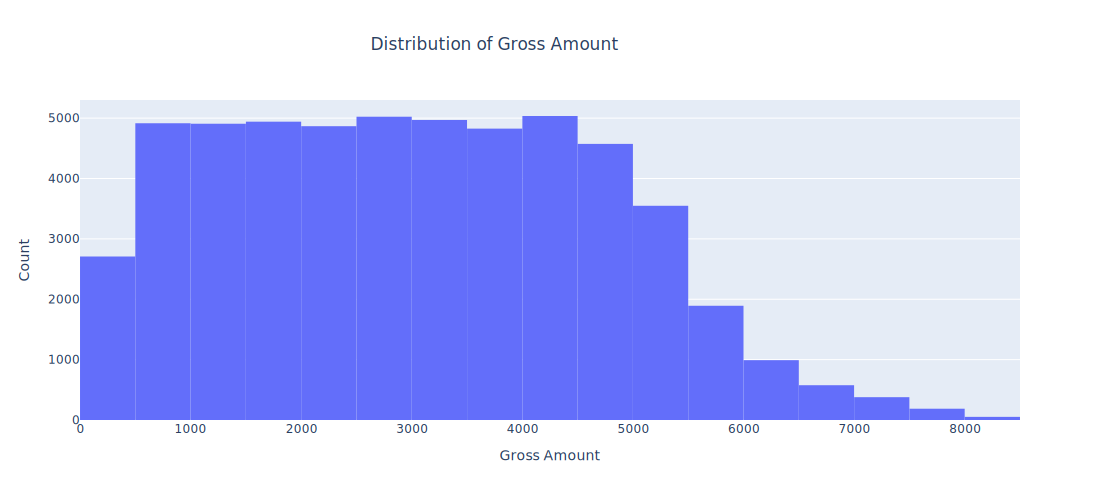

In [31]:
# Distribution of Gross amount.
fig = px.histogram(df, x="Gross Amount", nbins=20,
                   title="Distribution of Gross Amount",
                   width=1100,
                   height=500
                   )

fig.update_layout(xaxis_title="Gross Amount", yaxis_title="Count",bargap=0.001,title_x=0.45)

fig.show("svg")

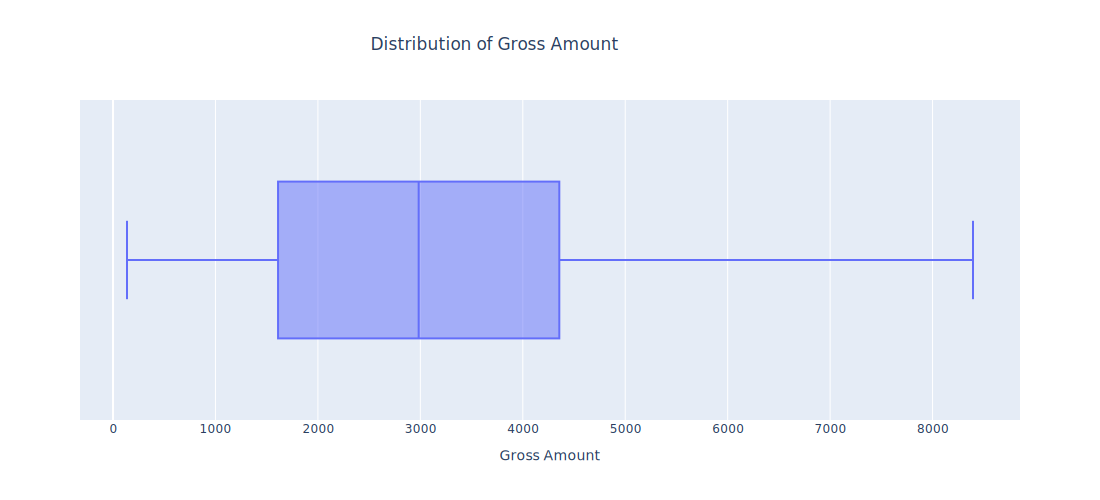

In [32]:
# Distribution of Gross amount.
fig = px.box(df, x="Gross Amount", title="Distribution of Gross Amount",
            width=1100,
            height=500)
fig.update_layout(title_x=0.45)
fig.show("svg")

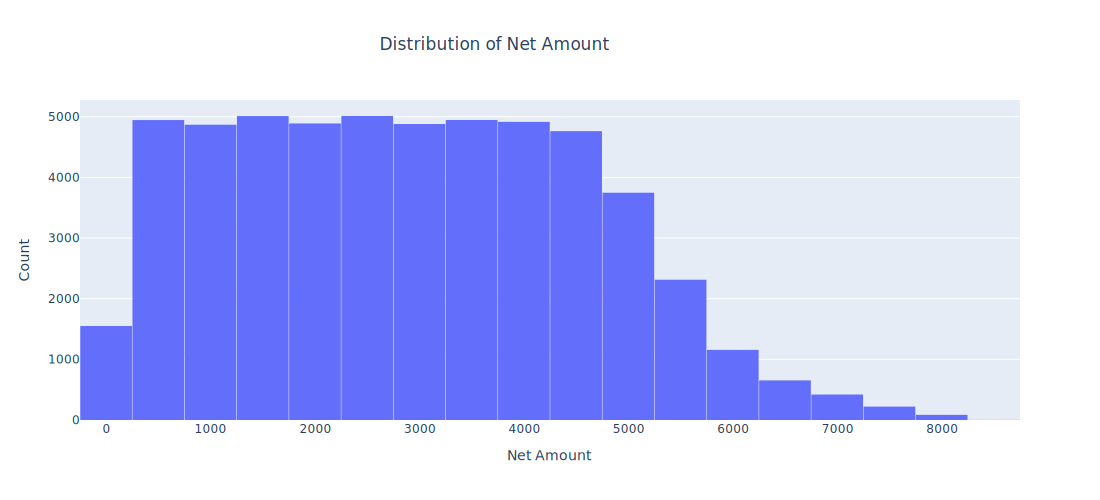

In [33]:
# Distribution of Net amount.
fig = px.histogram(df, x="Net Amount", nbins=20,
                   title="Distribution of Net Amount",
                   width=1100,
                   height=500
                   )

fig.update_layout(xaxis_title="Net Amount", yaxis_title="Count",bargap=0.01,title_x=0.45)

fig.show("svg")

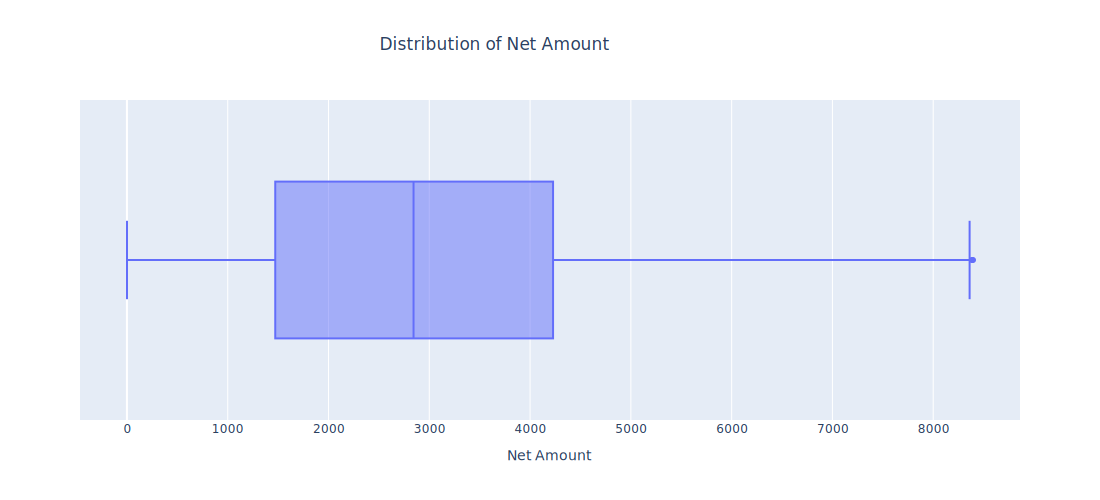

In [34]:
# Distribution of Net amount.
fig = px.box(df, x="Net Amount", title="Distribution of Net Amount",
            width=1100,
            height=500)
fig.update_layout(title_x=0.45)
fig.show("svg")

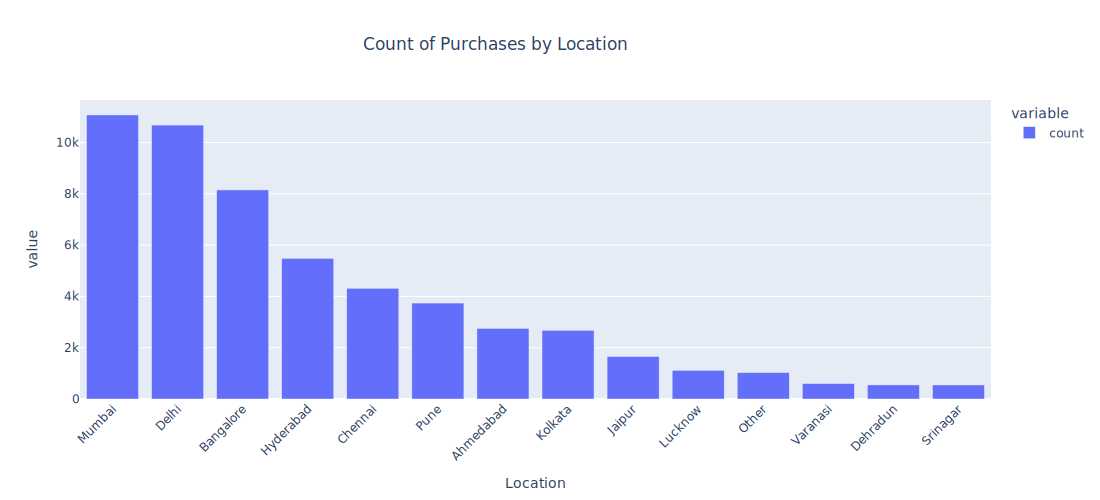

In [35]:
# Count of purchases based on the location.
fig = px.bar(df['Location'].value_counts(),
             title='Count of Purchases by Location',
             labels={'x': 'Location', 'y': 'Count'},
             category_orders={'Location': df['Location'].value_counts().index},
             width=1100,
             height=500)

fig.update_layout(xaxis_tickangle=-45,title_x=0.45)

fig.show("svg")

# BIVARIATE ANALYSIS

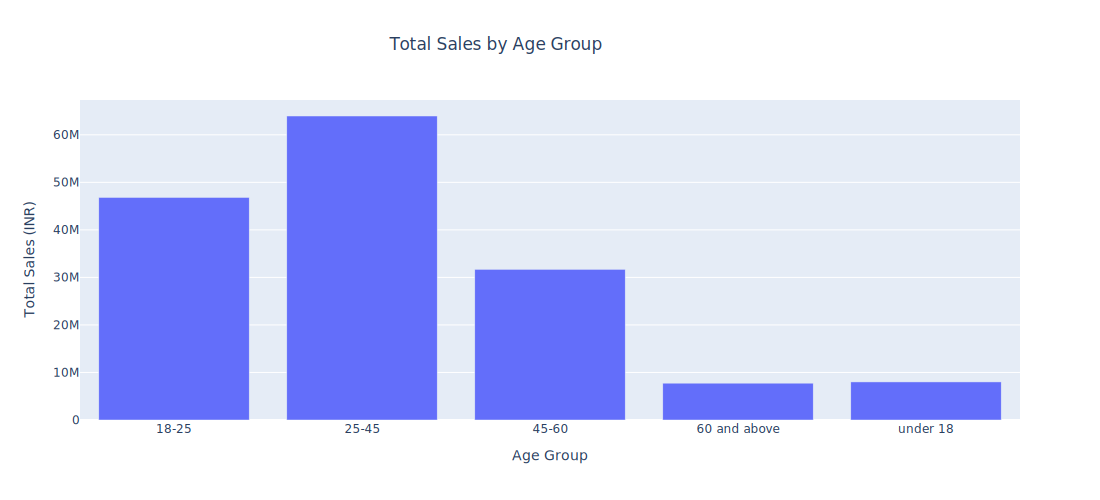

In [37]:
# Plot based on Age Group VS Total Sales.
age_group = df.groupby('Age Group').agg(total_sales=('Net Amount', 'sum')).reset_index()

fig = px.bar(age_group,
             x='Age Group',
             y='total_sales',
             title='Total Sales by Age Group',
             labels={'total_sales': 'Total Sales (INR)', 'Age Group': 'Age Group'},
             width=1100,
             height=500)
fig.update_layout(title_x=0.45)

fig.show("svg")

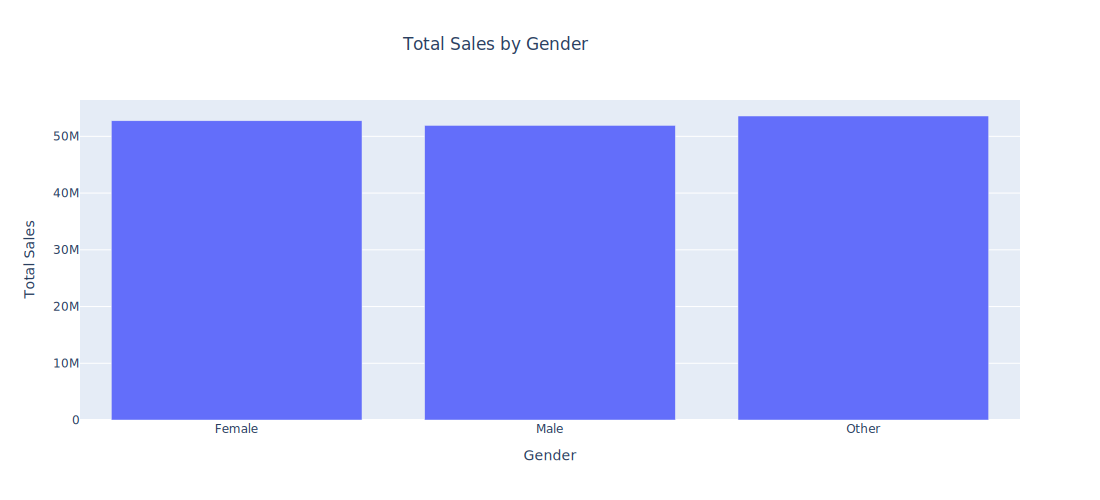

In [38]:
# Sales based on the gender.
gender_sales = df.groupby('Gender')['Net Amount'].sum().reset_index()

fig = px.bar(gender_sales,
             x='Gender',
             y='Net Amount',
             title='Total Sales by Gender',
             labels={'Net Amount': 'Total Sales'},
             width=1100,
             height=500)
fig.update_layout(title_x=0.45)
fig.show("svg")

Text(0, 0.5, 'Net Purchase Amount')

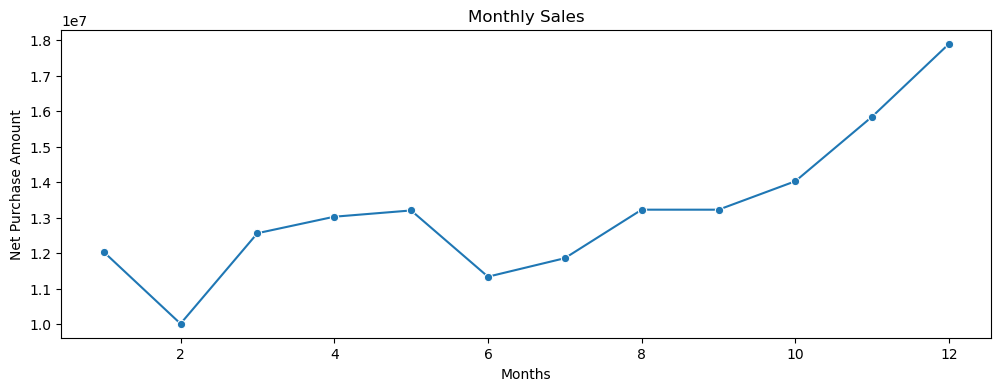

In [39]:
# Net amount VS Months.
monthly_sales = df.groupby(df['Purchase Date'].dt.month)['Net Amount'].sum().reset_index()
monthly_sales = monthly_sales.sort_values(by = 'Net Amount', ascending = True)

plt.figure(figsize=(12,4))

a = sns.lineplot(monthly_sales, x='Purchase Date', y='Net Amount', marker = 'o')
plt.title('Monthly Sales')
plt.xlabel('Months')
plt.ylabel('Net Purchase Amount')

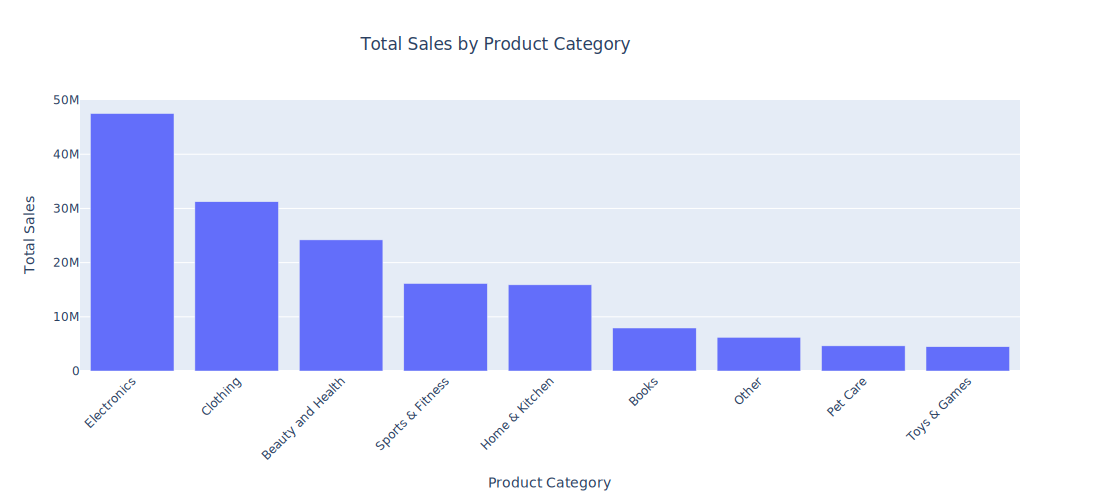

In [40]:
# Total sales by Product Category.
product_sales = df.groupby('Product Category')['Net Amount'].sum().reset_index()
product_sales = product_sales.sort_values(by=['Net Amount'], ascending=False)

fig = px.bar(product_sales,
             x='Product Category',
             y='Net Amount',
             title='Total Sales by Product Category',
             labels={'Net Amount': 'Total Sales'},
             width=1100,
             height=500)

fig.update_layout(xaxis_tickangle=-45,title_x=0.45)
fig.show("svg")

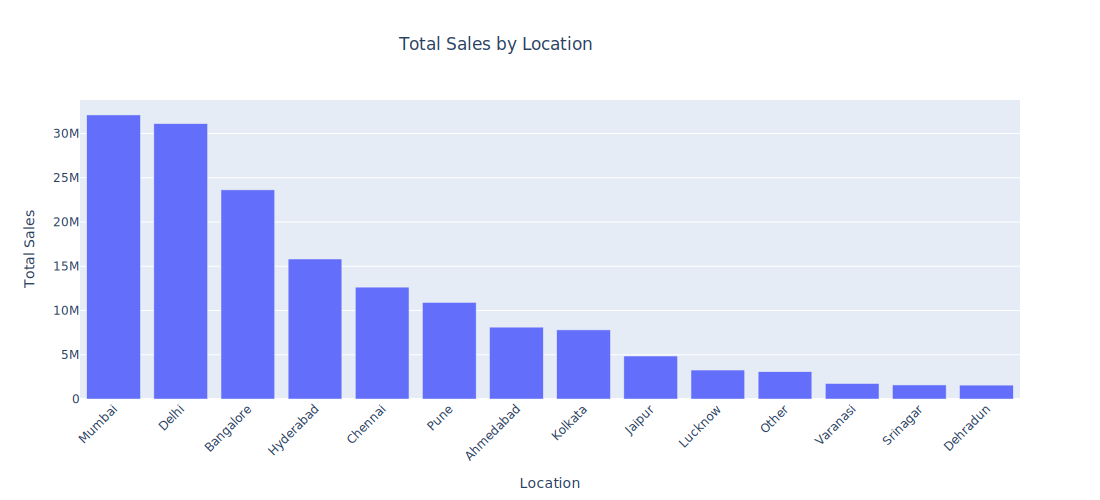

In [41]:
# Total Sales by Location.
location_sales = df.groupby('Location')['Net Amount'].sum().reset_index()
location_sales = location_sales.sort_values(by=['Net Amount'], ascending=False)

fig = px.bar(location_sales,
             x='Location',
             y='Net Amount',
             title='Total Sales by Location',
             labels={'Net Amount': 'Total Sales'},
             width=1100,
             height=500)

fig.update_layout(xaxis_tickangle=-45,title_x=0.45)

fig.show("svg")

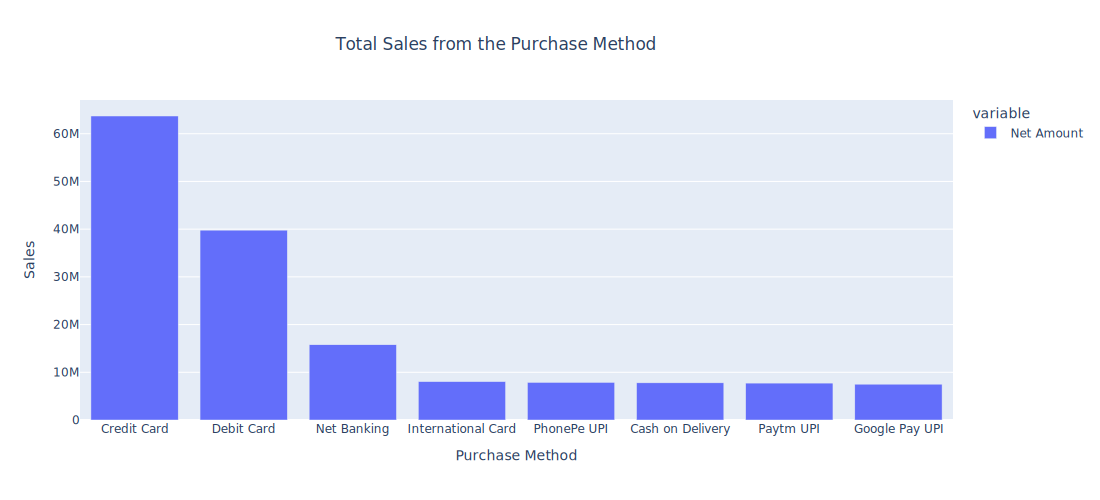

In [42]:
# Total Sales from the Purchase Method.
purchase_method_sales = df.groupby('Purchase Method')['Net Amount'].sum().sort_values(ascending=False)
fig = px.bar(purchase_method_sales,
             title="Total Sales from the Purchase Method",
             hover_data= {'variable': None},
             labels={'value': 'Sales'},
             width=1100,
             height=500
         )
fig.update_layout(title_x=0.45)
fig.show("svg")

# CONCLUSION:

**1.Customer Demographics:**
- Female customers slightly outnumber male customers.
- The majority of customers fall within the 25-45 age group and has highest purchases.The young age group(Under 18) and the old age group(above 60) comparatively have lower purchases.

**2.Product Performance::**
- "Clothing" and "Electronics" are the top-selling product categories, indicating strong demand in these areas. The other products like Beauty and Health, Sports and Fitness also showed significant sales.
  
**3.Sales Trends:**
- Sales show a peak in October,November and December which is expected due to the holiday season. Other months with lower sales could be analyzed to investigate potential reasons (e.g., economic conditions, product availability).

**4.Discounts and Promotions:**
 - A significant portion of purchases involve discounts. Analyzing which discounts drive the highest revenue would be beneficial for optimizing promotional offers. The visualization of discount distribution can provide insights into the most effective discount types.

**5.Geographic Insights:**
- Metro cities like Mumbai, Delhi and Banglore are the high-performing regions. Targeting these specific areas with high sales potential could lead to increased revenue.

**6.Payment Preferences:**
- Credit cards and debit cards are the most preferred methods of payment, accounting for the highest percentage of sales.Net banking and UPI-based payments (PhonePe, Paytm, Google Pay) are also gaining popularity, contributing a significant portion of the sales. 

# Recommendations:

Strategies that can be implemented based on Data Insights:

**Targeted Promotions for Age Groups**: Analyze purchase patterns of younger and older demographics. Offer targeted discounts or promotions on specific products they might find appealing.

**Upsell and Cross-sell Opportunities**: Since clothing and electronics are top sellers, use targeted campaigns to suggest complementary products (e.g., accessories for clothing, extended warranties or cleaning supplies for electronics).

**Seasonal Marketing Campaigns**: Capitalize on peak sales periods by launching exciting marketing campaigns and promotions during the holiday season (October-December). Consider pre-holiday sales or early access for loyal customers.

**Optimize Discounts for Higher Revenue**: Analyze which discounts are most effective at driving sales. Focus on those types of discounts in future promotions.

**Targeted Geographic Marketing**: Increase focus on metro cities with high sales potential. Offer local promotions or highlight convenient delivery options in these areas.

**Payment Options**: Cater to customer preferences by offering a variety of secure payment options which include's minimum convenience fees.